# Tiesinė regresija užduotis

In [101]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')

In [4]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [26]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [42]:
sns.set_style("whitegrid")

In [44]:
sns.set_palette('tab10')

<Axes: xlabel='Species', ylabel='count'>

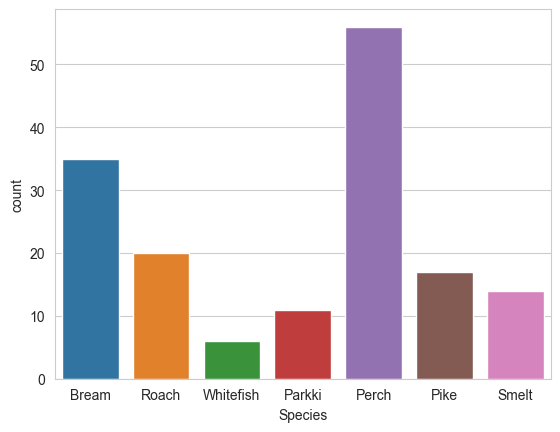

In [49]:
sns.countplot(x=fish["Species"], palette='tab10', hue=fish['Species'])

<Axes: >

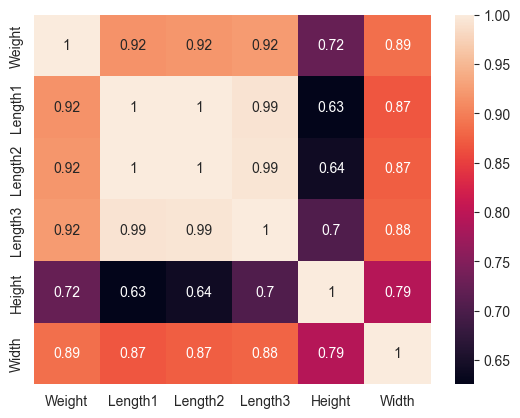

In [179]:
sns.heatmap(fish.corr(numeric_only=True), annot=True)

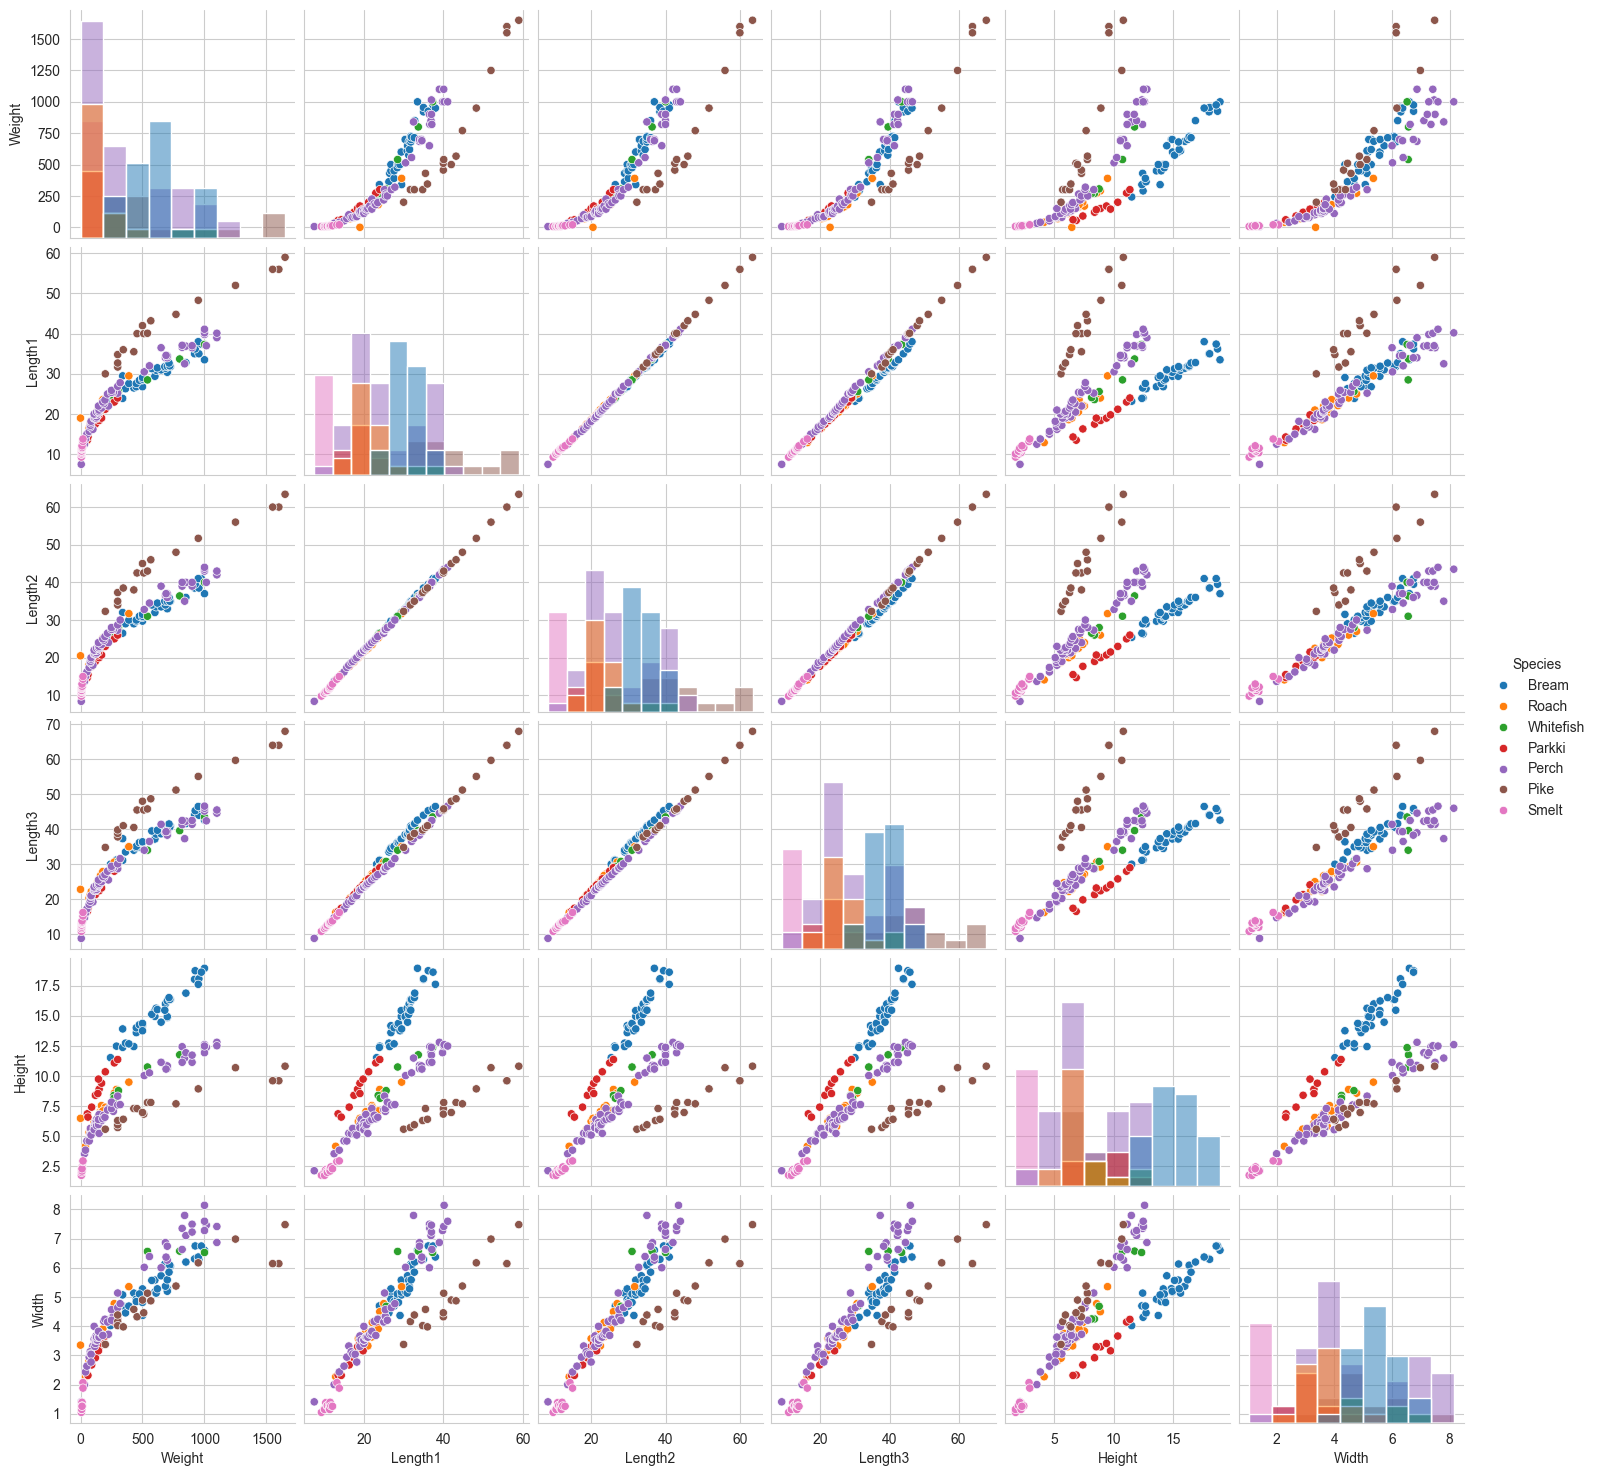

In [186]:
sns.pairplot(data=fish, hue='Species', diag_kind='hist')

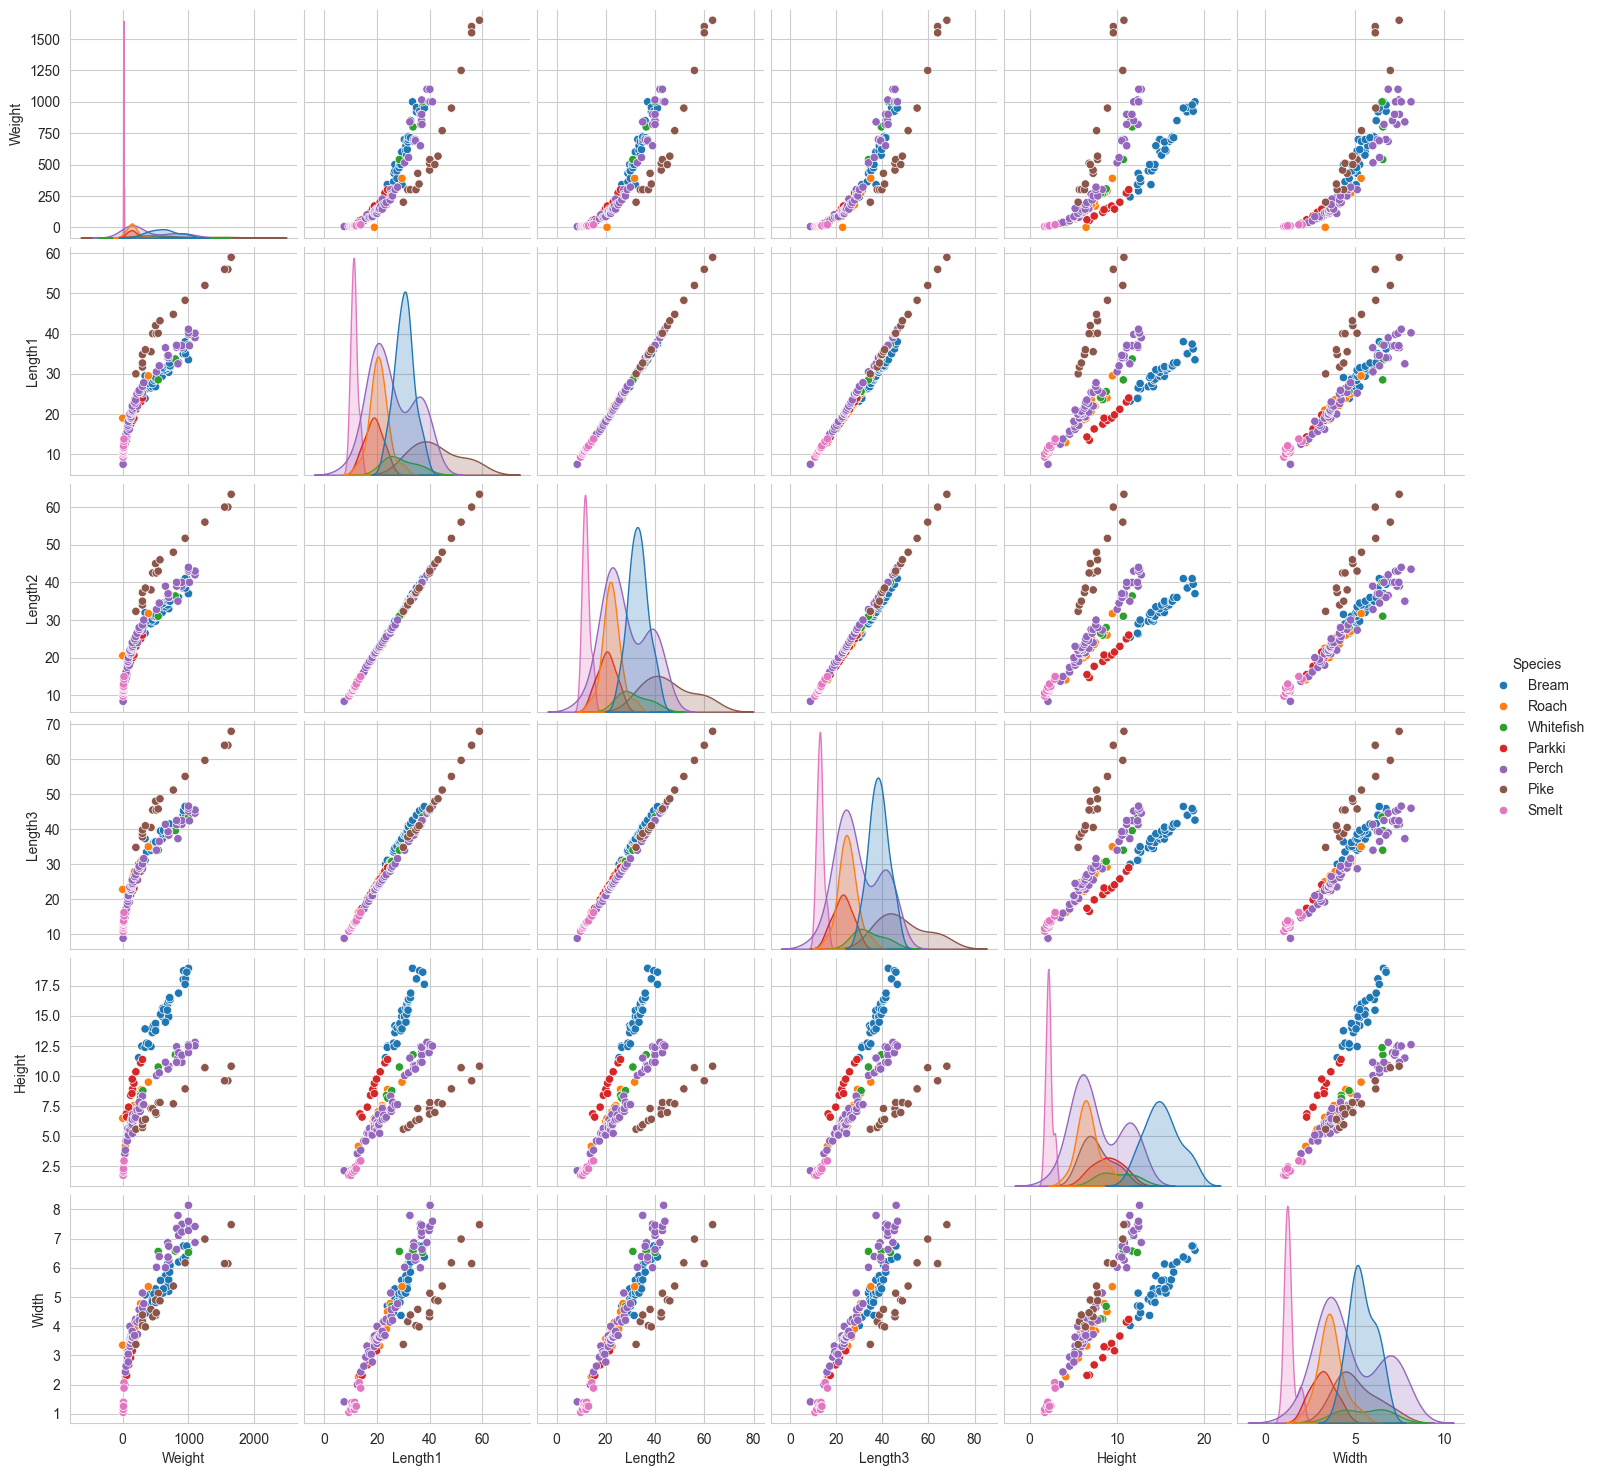

In [71]:
sns.pairplot(data=fish, hue='Species', diag_kind='kde')

<Axes: xlabel='Species', ylabel='Weight'>

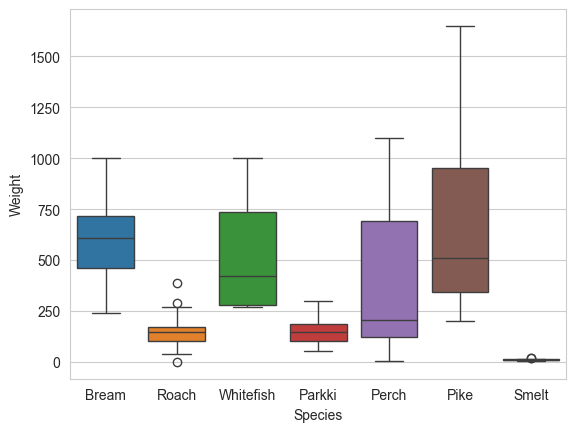

In [192]:
sns.boxplot(x=fish["Species"], y=fish["Weight"], palette='tab10', hue=fish["Species"])

In [76]:
dummies = pd.get_dummies(fish['Species'])

In [10]:
dummies.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [82]:
data = pd.concat([fish, dummies], axis=1)

In [83]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   Length1    159 non-null    float64
 3   Length2    159 non-null    float64
 4   Length3    159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
 7   Bream      159 non-null    bool   
 8   Parkki     159 non-null    bool   
 9   Perch      159 non-null    bool   
 10  Pike       159 non-null    bool   
 11  Roach      159 non-null    bool   
 12  Smelt      159 non-null    bool   
 13  Whitefish  159 non-null    bool   
dtypes: bool(7), float64(6), object(1)
memory usage: 9.9+ KB


In [90]:
data.drop(['Species'], axis=1, inplace=True)


In [91]:
data.head()


,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [98]:
data.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [105]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [137]:
data_answers = data.columns[0]
x = data[data_answers]


In [240]:
x.head

<bound method NDFrame.head of 0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64>

In [131]:
data_queries = data.columns[1:]
y = data[data_queries]

In [228]:
y.head(60)

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
5,26.8,29.7,34.7,13.6024,4.9274,True,False,False,False,False,False,False
6,26.8,29.7,34.5,14.1795,5.2785,True,False,False,False,False,False,False
7,27.6,30.0,35.0,12.6700,4.6900,True,False,False,False,False,False,False
8,27.6,30.0,35.1,14.0049,4.8438,True,False,False,False,False,False,False
9,28.5,30.7,36.2,14.2266,4.9594,True,False,False,False,False,False,False


In [372]:
from sklearn.model_selection import train_test_split
queries_train, queries_test, answers_train, answers_test = \
train_test_split(y, x, test_size=0.25, random_state=100)


In [373]:
answers_train

145      6.7
122    820.0
106    250.0
96     225.0
133    345.0
       ...  
87     120.0
103    260.0
67     170.0
24     700.0
8      450.0
Name: Weight, Length: 119, dtype: float64

In [374]:
answers_test

45      160.0
11      500.0
127    1000.0
15      600.0
7       390.0
114     700.0
139     770.0
1       290.0
155      13.4
51      180.0
31      955.0
73       32.0
26      720.0
29     1000.0
117     650.0
88      130.0
41      110.0
40        0.0
59      800.0
104     265.0
54      390.0
32      925.0
85      130.0
148       9.7
46      140.0
158      19.9
124    1000.0
20      575.0
28      850.0
77      100.0
128     200.0
152       9.9
120     900.0
65      150.0
12      500.0
16      700.0
62       60.0
134     456.0
109     514.0
95      170.0
Name: Weight, dtype: float64

In [375]:
from sklearn.linear_model import LinearRegression

In [376]:
regresija = LinearRegression().fit(queries_train, answers_train)

In [377]:
regresija.score(queries_test, answers_test)   

0.921676642015161

In [378]:
# NESUPRANTUUUU:
# Kurie yra spejamieji (nors jau zinotini) duomenys, o kurie iamami apskaičiavimams. (Turiu omeny: test (yra spejamieji??) ir train duomenys(imami apskaiciavimams???))

In [379]:
pritaikymas = regresija.predict(queries_test)

In [380]:
pritaikymas

array([ 201.0409344 ,  501.67886061, 1038.65575357,  545.64802951,
        475.81881139,  753.21215739,  836.45547455,  324.32884886,
         40.12458381,  285.11649475,  831.30938166, -200.40853955,
        685.74373222,  766.96170059,  830.30082536,  155.84045556,
        113.91155942,   89.91995468,  715.92539621,  366.27596833,
        564.78714089,  862.74231901,  125.91957182,  -21.01379191,
        173.70504667,  164.58288967, 1008.24337077,  640.03310045,
        730.4770078 ,  -12.30035336,  174.60293553,   13.93871548,
        889.62664958,  126.09047036,  524.19227656,  593.07879323,
        -63.72264902,  585.004567  ,  552.78427782,  213.41626398])

In [381]:
palyginimui=pd.Series(data=pritaikymas, name='Nuspetas svoris')

In [382]:
palyginimui

0      201.040934
1      501.678861
2     1038.655754
3      545.648030
4      475.818811
5      753.212157
6      836.455475
7      324.328849
8       40.124584
9      285.116495
10     831.309382
11    -200.408540
12     685.743732
13     766.961701
14     830.300825
15     155.840456
16     113.911559
17      89.919955
18     715.925396
19     366.275968
20     564.787141
21     862.742319
22     125.919572
23     -21.013792
24     173.705047
25     164.582890
26    1008.243371
27     640.033100
28     730.477008
29     -12.300353
30     174.602936
31      13.938715
32     889.626650
33     126.090470
34     524.192277
35     593.078793
36     -63.722649
37     585.004567
38     552.784278
39     213.416264
Name: Nuspetas svoris, dtype: float64

In [383]:
duomenys_palyginimui = pd.concat([answers_test.reset_index(), palyginimui], axis=1)

In [384]:
duomenys_palyginimui

,index,Weight,Nuspetas svoris
0,45,160.0,201.040934
1,11,500.0,501.678861
2,127,1000.0,1038.655754
3,15,600.0,545.648030
4,7,390.0,475.818811
5,114,700.0,753.212157
6,139,770.0,836.455475
7,1,290.0,324.328849
8,155,13.4,40.124584
9,51,180.0,285.116495


### Užduotis
Turime lentelę su 7 žuvų rūšim, bei įvairiais jų išmatavimais. Vienas iš jų yra svoris - tai bus mūsų *target* stulpelis. **Sukurkite tiesinės regresijos modelį, kuris pagal kitus lentelės stulpelius spėlios žuvies svorį.** Išsiaiškinkite, ar yra trūkstamų reikšmių, atsispausdinkite keletą diagramų ir histogramų, patyrinėkite tendencijas ir koreliacijas. Kilus neaiškumams, remkitės paskaitos medžiaga. Sėkmės!
